# Life expectancies

In [1]:
import pandas as pd

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

Differences between Men and Women in Mortality and the Health Dimensions of the Morbidity Process

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6345642/

In [3]:
os.chdir(os.environ['HOME'] + '/DUMP')

# Data sources

We are interested in seeing what we can get 
out from the demographical data we can get 
from the **INSEE**

base_url = 'https://www.insee.fr/fr/statistiques/1913143'


---

There are 4 files available f you look hard enough

- pyramide-des-ages-2020.xls
- pyramide-des-ages-2019.xls
- pyramide-des-ages-2017.xls   
- pyramide-des-ages-2018.xls


---

I actually downloaded them by hand but you can do a get()

In [319]:
ls *xls

pop-totale-france-metro.xls  pyramide-des-ages-2019.xls
pyramide-des-ages-2017.xls   pyramide-des-ages-2020.xls
pyramide-des-ages-2018.xls


In [320]:
np.roll(np.arange(2017,2021),shift=1)

array([2020, 2017, 2018, 2019])

## We'll stick them in an array 

it's convenient because we are going to do a few diffs

There are 5 columns.


In [321]:
dfs = [ pd.read_excel('pyramide-des-ages-%d.xls'%x, skiprows=5 )
                                             for x in np.arange(2017,2021)]

dfs[0][:5]

,Année de naissance,Âge révolu,Nombre d'hommes,Nombre de femmes,Ensemble
0,2016,0,377237,361116,738353
1,2015,1,387510,370874,758384
2,2014,2,396795,384234,781029
3,2013,3,403205,385980,789185
4,2012,4,415088,395182,810270


## The first column  is a fecker

the last entries are text :(

In [120]:
dfs[0].iloc[:-2,0][-10:]

90    1926
91    1925
92    1924
93    1923
94    1922
95    1921
96    1920
97    1919
98    1918
99    1917
Name: Année de naissance, dtype: object

## I use np.roll a lot

but you can use zip

In [322]:
k = col = 0
U = np.roll(dfs[k].iloc[:-2,col],shift=1) -  dfs[k+1].iloc[:-2,col] 
U[:5]

0    -100
1       0
2       0
3       0
4       0
Name: Année de naissance, dtype: object

## I should use a decorator to set up the graphs ?

if fig is local to the decorator and global 
to the wrapped code then sure..

In [323]:
def all_plot(col=-1, 
             label='number of deaths both sexes',
             start=60):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)

    for k in range(3):   
        U =np.roll(dfs[k].iloc[:,col],shift=1) -  dfs[k+1].iloc[:,col] 
        ax.plot(U[start:-2] ,label='data%d'%k)


    plt.ylabel(label)
    leg = ax.legend()
    
  

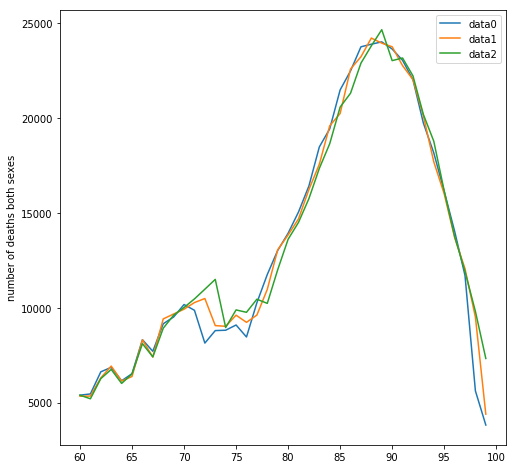

In [324]:
all_plot()

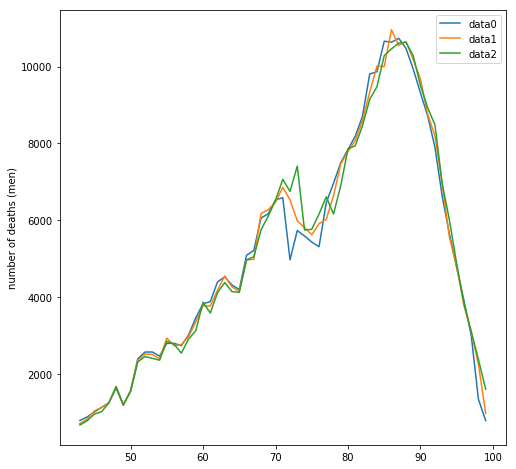

In [69]:
all_plot(col=-3, 
        label='number of deaths (men)',
        start=43)


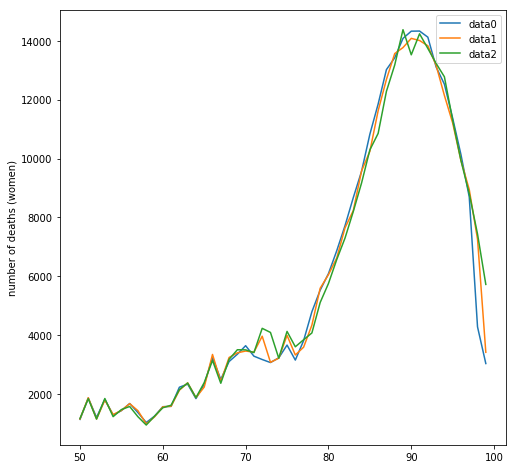

In [66]:
all_plot(col=-2, 
        label='number of deaths (women)',
        start=50)

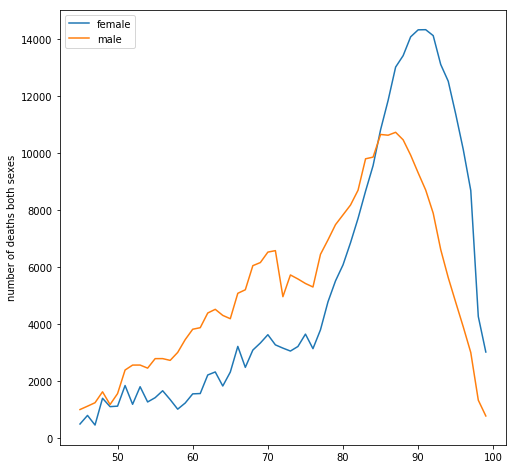

In [77]:
def yr_plot(k=0, 
            start=60):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
   
    U = np.roll(dfs[k].iloc[:,-2],shift=1) -  dfs[k+1].iloc[:,-2] 
    ax.plot(U[start:-2] ,label='female')
    U = np.roll(dfs[k].iloc[:,-3],shift=1) -  dfs[k+1].iloc[:,-3] 
    ax.plot(U[start:-2] ,label='male')


    plt.ylabel('number of deaths both sexes')
    leg = ax.legend()

yr_plot(k=0, start=45)

203.73076923076925 0.9456158123063966 1.063422106972916e-06
876.9384615384615 0.9970122806008709 1.0203489964861413e-14


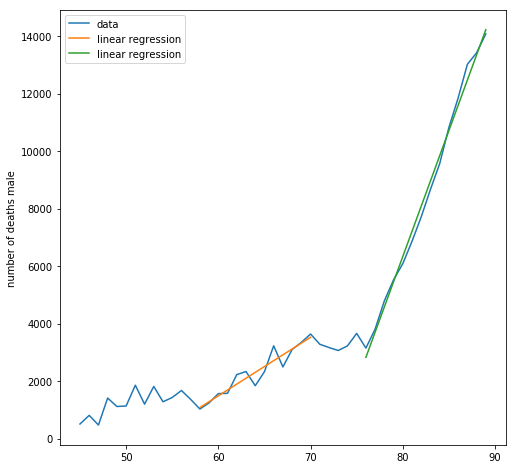

In [133]:
k = 0
col = -2

fig, ax = plt.subplots()
fig.set_size_inches(8,8)

U = np.roll(dfs[k].iloc[:,col],shift=1) -  dfs[k+1].iloc[:,col] 

ax.plot(U[45:90] ,label='data')

for T in [np.arange(58,71), np.arange(76,90)]:
    
    vv = stats.linregress(T, U[T])
    yy = T*vv.slope + vv.intercept
    ax.plot(T,np.interp(T,T,yy),label='linear regression')
    print(vv.slope, vv.rvalue, vv.pvalue)



plt.ylabel('number of deaths male')
leg = ax.legend()


## Conditional probabilities

my code is a bit obscure 
but I've seen worse in TensorFlow ;)

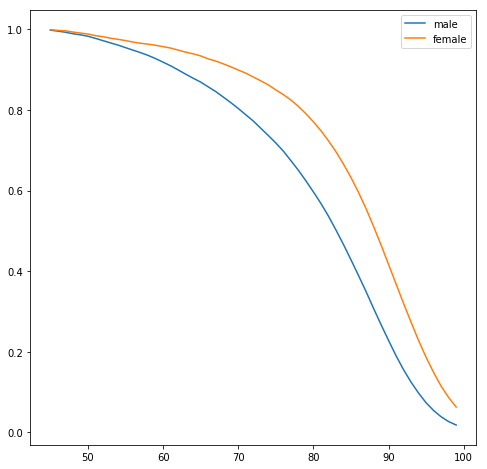

In [160]:
k = 0 
start = 45

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
   
for col,l in zip([2,3],['male','female']):
    U = dfs[k+1].iloc[:,col] /np.roll(dfs[k].iloc[:,col],shift=1)   
    V = np.cumsum(np.log(U[start:-2]))
    ax.plot(np.exp(V) ,label=l)

leg = ax.legend()

## Conditional life expectancy

In [316]:
for start in np.arange(70,80):
    k = 2   # this is the pair of years
    col = 2
    U = dfs[k+1].iloc[:,col] /np.roll(dfs[k].iloc[:,col],shift=1)  

    T = np.arange(start,100)
    V = np.exp(np.cumsum(np.log(U[T])))
    vv = np.roll(V, shift=1)
    vv[0] = 1

    yy = np.dot(vv - V, (T-1)) + 100 * ( 1 - sum(vv - V) ) # esperance de vie
    print(start, yy)

70 84.69608111033067
71 84.98244808984927
72 85.28152902643129
73 85.56197849923541
74 85.87680126638587
75 86.19019658545575
76 86.49822277563307
77 86.82315707153325
78 87.18436418515056
79 87.55047441079799


In [318]:
df[11:21]

,YY,EY,EL
11,1941,8.59,87.95
12,1942,9.18,87.54
13,1943,9.80,87.15
14,1944,10.42,86.78
15,1945,11.07,86.43
16,1946,11.73,86.09
17,1947,12.40,85.76
18,1948,13.08,85.44
19,1949,13.77,85.13
20,1950,14.47,84.83


# Checking


so I found some site that has a life expectancy calculator
based on different models


http://mon-convertisseur.fr/estimation-esperance-vie-residuelle.php


Scaping it is very very very easy.

I'm not going to use BS to parse as I only want two numbers

In [326]:
import requests
import re
pp = re.compile('<strong>(\d.*?)\s',re.DOTALL)
pp.findall(r.text)

url = 'http://mon-convertisseur.fr/estimation-esperance-vie-residuelle.php'

payload = {'SEXE' : 'H',
          'COUNTRYCODE' : 'FR',
          'DD1' : '01',
          'MM1' : '01',
          'YYYY1' : '1966',
          'DD2' : '11',
          'MM2' : '05',
          'YYYY2' : '2020',
          'CODTAB' : 'CIA2012',
          'btnSbmt1' :  'Estimer espérance de vie'}

data = []
for k in np.arange(1930,1975):
    payload['YYYY1'] = str(k)
    r = requests.get(url, params=payload)
    ss = [k]
    ss.extend(pp.findall(r.text))
    data.append(ss)

In [298]:

df = pd.DataFrame(data, 
               columns =['YY', 'EY','EL']) 

df['EY'] = df['EY'].values.astype(float)
df['EL'] = df['EL'].values.astype(float)

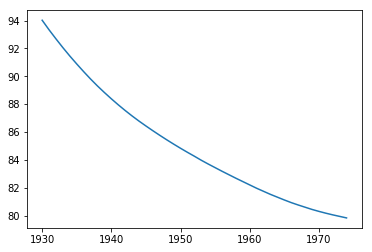

In [303]:
plt.plot(np.arange(1930,1975),df['EL'])

In [311]:
df[10:20]

,YY,EY,EL
10,1940,8.02,88.38
11,1941,8.59,87.95
12,1942,9.18,87.54
13,1943,9.80,87.15
14,1944,10.42,86.78
15,1945,11.07,86.43
16,1946,11.73,86.09
17,1947,12.40,85.76
18,1948,13.08,85.44
19,1949,13.77,85.13


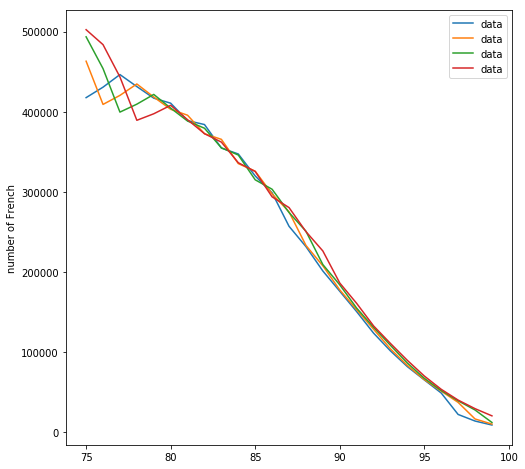

In [256]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

for df in dfs:   
    X = df.iloc[75:100,-1]
    ax.plot(X,label='data')


plt.ylabel('number of French')
leg = ax.legend()
    

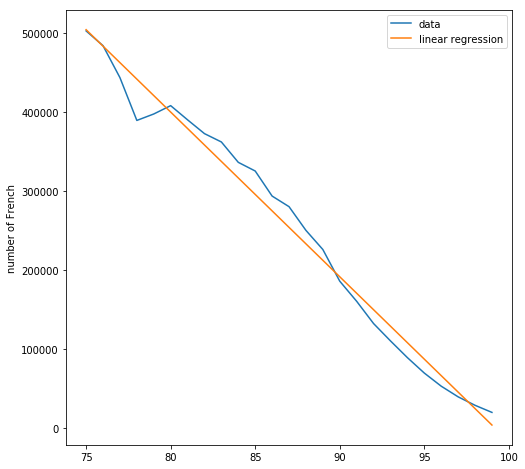

In [31]:
from scipy import stats

df = dfs[-1]
X = df.iloc[75:100,-1]

fig, ax = plt.subplots()
fig.set_size_inches(8,8)

ax.plot(X,label='data')
T = np.arange(75,100)

vv = stats.linregress(T, X)

xx = np.array([0,100])
yy = xx*vv.slope + vv.intercept

ax.plot(T,np.interp(T,xx,yy),label='linear regression')
plt.ylabel('number of French')
leg = ax.legend()

In [20]:
vv.slope # should be near the total deaths ~600 000

-20750.883846153847

In [50]:
X.sum()/df.iloc[:-1,-1].sum()

0.09594977370164859

In [ ]:

# import HTMLSession from requests_html
from requests_html import AsyncHTMLSession

import asyncio
if asyncio.get_event_loop().is_running(): # Only patch if needed (i.e. running in Notebook, Spyder, etc)
    import nest_asyncio
    nest_asyncio.apply()
    
#https://github.com/psf/requests-html/issues/294

async def main():
    url = 'https://www.euromomo.eu/graphs-and-maps#z-scores-by-country'
    session = AsyncHTMLSession()
    r = await session.get(url)
    await r.html.arender()
    x = await r.html.raw_html
    return x

print("starting")
df = asyncio.get_event_loop().run_until_complete(main())
print(df)

starting


In [1]:
from requests_html import HTMLSession

url = 'https://www.euromomo.eu/graphs-and-maps#z-scores-by-country'
session = HTMLSession()
r = session.get(url)
print(r.html.render()[:1000])

   

In [3]:
r.html.render()


RuntimeError: Cannot use HTMLSession within an existing event loop. Use AsyncHTMLSession instead.

In [2]:
import asyncio
import time

async def say_after(delay, what):
    await asyncio.sleep(delay)
    print(what)

async def main():
    print(f"started at {time.strftime('%X')}")

    await say_after(1, 'hello')
    await say_after(2, 'world')

    print(f"finished at {time.strftime('%X')}")

asyncio.run(main())

started at 16:28:31
hello
world
finished at 16:28:34


In [57]:

url = 'https://www.euromomo.eu/app-c8f47833a3ed3eeb35b5.js'

url = ''

r = requests.get(url, allow_redirects=True)


In [16]:
with open('untitled1.svg', 'r') as fp:
    svg = fp.read()

In [15]:
!ls | grep unt*

untitled1.svg


In [17]:
svg

'<svg xmlns="http://www.w3.org/2000/svg" role="img" width="268.3077087402344" height="125.00000762939453"><rect width="268.3077087402344" height="125.00000762939453" fill="transparent"></rect>\n    <g transform="translate(35,7)">\n        <g><line x1="0" x2="223.30770874023438" y1="80" y2="80" stroke="#dddddd" stroke-width="4">\n        </line><line x1="0" x2="223.30770874023438" y1="48" y2="48" stroke="#dddddd" stroke-width="1"></line>\n        <line x1="0" x2="223.30770874023438" y1="17" y2="17" stroke="#dddddd" stroke-width="4"></line></g>\n        \n        <path d="M0,80L1,79L2,79L3,80L4,80L5,82L6,79L8,82L9,79L10,80L11,78L12,79L13,75L14,81L15,82L16,83L17,80L18,78L19,81L20,81L22,81L23,81L24,81L25,80L26,78L27,77L28,79L29,80L30,80L31,78L32,80L33,82L35,80L36,77L37,73L38,68L39,62L40,62L41,66L42,66L43,68L44,72L45,77L46,79L47,80L49,81L50,83L51,84L52,84L53,83L54,83L55,83L56,79L57,79L58,80L59,79L60,79L61,81L63,83L64,81L65,75L66,82L67,76L68,80L69,79L70,79L71,78L72,81L73,81L74,79L76,80L77,83

In [2]:
import re
pp = re.compile('[M|L]\d+,(\d+)')



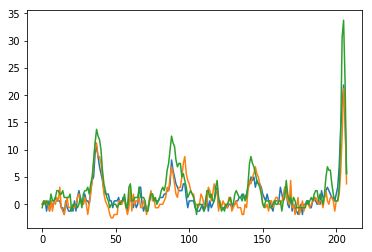

In [12]:
for c in [it,fr,sp]:
    X = 80. - np.array([ int(x) for x in pp.findall(c)])
    X *= 20/(80-48)
    plt.plot(X[:])

In [3]:
fr ='<svg xmlns="http://www.w3.org/2000/svg" role="img" width="268.3077087402344" height="125.00000762939453"><rect width="268.3077087402344" height="125.00000762939453" fill="transparent"></rect><g transform="translate(35,7)"><g><line x1="0" x2="223.30770874023438" y1="80" y2="80" stroke="#dddddd" stroke-width="1"></line><line x1="0" x2="223.30770874023438" y1="48" y2="48" stroke="#dddddd" stroke-width="1"></line><line x1="0" x2="223.30770874023438" y1="17" y2="17" stroke="#dddddd" stroke-width="1"></line></g><path d="M 39 100 V 0 M 95 100 V 0 M 151 100 V 0 M 207 100 V 0 " class="graphs-module--yearLine--2ja0H"></path><line x1="0" y1="80" x2="223" y2="80" class="graphs-module--zeroLine--JtGSY"></line><polygon points="0 83 223 83 223 77 0 77" class="graphs-module--normalRange--dfTA0"></polygon>;<line x1="0" y1="80" x2="223" y2="80" class="graphs-module--baseLine--ECgvs"></line><line x1="0" y1="73" x2="223" y2="73" class="graphs-module--substantialLine--11No8"></line><path d="M0,80L1,79L2,79L3,80L4,80L5,82L6,79L8,82L9,79L10,80L11,78L12,79L13,75L14,81L15,82L16,83L17,80L18,78L19,81L20,81L22,81L23,81L24,81L25,80L26,78L27,77L28,79L29,80L30,80L31,78L32,80L33,83L35,80L36,77L37,73L38,68L39,62L40,62L41,66L42,66L43,68L44,72L45,77L46,79L47,80L49,81L50,83L51,84L52,84L53,83L54,83L55,83L56,79L57,79L58,80L59,79L60,79L61,81L63,83L64,81L65,75L66,82L67,77L68,80L69,79L70,79L71,78L72,81L73,81L74,79L76,80L77,83L78,81L79,78L80,76L81,79L82,78L83,81L84,81L85,81L86,80L87,80L88,80L90,79L91,78L92,75L93,76L94,72L95,69L96,71L97,74L98,77L99,78L100,75L101,75L102,72L104,68L105,66L106,71L107,73L108,74L109,76L110,77L111,77L112,80L113,80L114,81L115,80L117,77L118,78L119,80L120,81L121,80L122,75L123,76L124,79L125,77L126,74L127,76L128,76L129,82L131,79L132,81L133,79L134,80L135,81L136,81L137,78L138,78L139,82L140,81L141,80L142,79L143,81L145,81L146,81L147,83L148,83L149,80L150,81L151,76L152,73L153,74L154,72L155,71L156,69L158,71L159,72L160,74L161,76L162,80L163,80L164,81L165,80L166,82L167,79L168,79L169,81L170,79L172,78L173,78L174,80L175,80L176,79L177,78L178,75L179,77L180,79L181,80L182,73L183,81L184,80L186,83L187,81L188,78L189,83L190,81L191,79L192,82L193,80L194,80L195,80L196,81L197,80L198,79L200,79L201,78L202,79L203,80L204,79L205,79L206,81L207,78L208,76L209,79L210,80L211,78L213,78L214,79L215,82L216,79L217,79L218,77L219,71L220,60L221,46L222,53L223,74" fill="none" stroke-width="2" stroke="#1646a7"></path><g transform="translate(223.30770874023438,0)"><line x1="0" x2="0" y1="0" y2="100.00000762939453" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line></g><g transform="translate(0,100.00000762939453)"><g transform="translate(0,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(18,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(39,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2017</text></g><g transform="translate(56,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(74,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(95,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2018</text></g><g transform="translate(112,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(131,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(151,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2019</text></g><g transform="translate(168,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(187,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(207,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2020</text></g><line x1="0" x2="223.30770874023438" y1="0" y2="0" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line><text transform="translate(111.65385437011719, 56) rotate(0)" text-anchor="middle" style="dominant-baseline: central; font-size: 12px; fill: rgb(171, 167, 167); font-family: sans-serif;"></text></g><g transform="translate(0,0)"><g transform="translate(0,80)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">0</text></g><g transform="translate(0,48)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">20</text></g><g transform="translate(0,17)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">40</text></g><line x1="0" x2="0" y1="0" y2="100.00000762939453" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line><text transform="translate(0, 50.000003814697266) rotate(-90)" text-anchor="middle" style="dominant-baseline: central; font-size: 12px; fill: rgb(171, 167, 167); font-family: sans-serif;"></text></g><rect x="220" y="0" width="3" height="100" class="graphs-module--uncertainty--2vclk"></rect><g><rect width="223.30770874023438" height="100.00000762939453" fill="red" opacity="0" style="cursor: auto;"></rect></g></g></svg>'

In [4]:
sss = '<svg xmlns="http://www.w3.org/2000/svg" role="img" width="268.3077087402344" height="125.00000762939453"><rect width="268.3077087402344" height="125.00000762939453" fill="transparent"></rect><g transform="translate(35,7)"><g><line x1="0" x2="223.30770874023438" y1="80" y2="80" stroke="#dddddd" stroke-width="1"></line><line x1="0" x2="223.30770874023438" y1="48" y2="48" stroke="#dddddd" stroke-width="1"></line><line x1="0" x2="223.30770874023438" y1="17" y2="17" stroke="#dddddd" stroke-width="1"></line></g><path d="M 0 100 V 0 " class="graphs-module--yearLine--2ja0H"></path><line x1="0" y1="80" x2="223" y2="80" class="graphs-module--zeroLine--JtGSY"></line><polygon points="0 83 223 83 223 77 0 77" class="graphs-module--normalRange--dfTA0"></polygon>;<line x1="0" y1="80" x2="223" y2="80" class="graphs-module--baseLine--ECgvs"></line><line x1="0" y1="73" x2="223" y2="73" class="graphs-module--substantialLine--11No8"></line><path d="M0,78L15,76L30,79L45,80L60,78L74,78L89,79L104,82L119,79L134,79L149,77L164,71L179,60L194,46L208,53L223,74" fill="none" stroke-width="2" stroke="#1646a7"></path><g transform="translate(223.30770874023438,0)"><line x1="0" x2="0" y1="0" y2="100.00000762939453" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line></g><g transform="translate(0,100.00000762939453)"><g transform="translate(0,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2020</text></g><g transform="translate(15,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">02</text></g><g transform="translate(30,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">03</text></g><g transform="translate(45,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">04</text></g><g transform="translate(60,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">05</text></g><g transform="translate(74,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">06</text></g><g transform="translate(89,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">07</text></g><g transform="translate(104,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">08</text></g><g transform="translate(119,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">09</text></g><g transform="translate(134,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">10</text></g><g transform="translate(149,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">11</text></g><g transform="translate(164,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">12</text></g><g transform="translate(179,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">13</text></g><g transform="translate(194,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">14</text></g><g transform="translate(208,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">15</text></g><g transform="translate(223,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">16</text></g><line x1="0" x2="223.30770874023438" y1="0" y2="0" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line><text transform="translate(111.65385437011719, 56) rotate(0)" text-anchor="middle" style="dominant-baseline: central; font-size: 12px; fill: rgb(171, 167, 167); font-family: sans-serif;"></text></g><g transform="translate(0,0)"><g transform="translate(0,80)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">0</text></g><g transform="translate(0,48)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">20</text></g><g transform="translate(0,17)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">40</text></g><line x1="0" x2="0" y1="0" y2="100.00000762939453" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line><text transform="translate(0, 50.000003814697266) rotate(-90)" text-anchor="middle" style="dominant-baseline: central; font-size: 12px; fill: rgb(171, 167, 167); font-family: sans-serif;"></text></g><rect x="179" y="0" width="44" height="100" class="graphs-module--uncertainty--2vclk"></rect><g><rect width="223.30770874023438" height="100.00000762939453" fill="red" opacity="0" style="cursor: auto;"></rect></g></g></svg>'

In [5]:
gb ='<svg xmlns="http://www.w3.org/2000/svg" role="img" width="268.3077087402344" height="125.00000762939453"><rect width="268.3077087402344" height="125.00000762939453" fill="transparent"></rect><g transform="translate(35,7)"><g><line x1="0" x2="223.30770874023438" y1="80" y2="80" stroke="#dddddd" stroke-width="1"></line><line x1="0" x2="223.30770874023438" y1="48" y2="48" stroke="#dddddd" stroke-width="1"></line><line x1="0" x2="223.30770874023438" y1="17" y2="17" stroke="#dddddd" stroke-width="1"></line></g><path d="M 39 100 V 0 M 95 100 V 0 M 151 100 V 0 M 207 100 V 0 " class="graphs-module--yearLine--2ja0H"></path><line x1="0" y1="80" x2="223" y2="80" class="graphs-module--zeroLine--JtGSY"></line><polygon points="0 83 223 83 223 77 0 77" class="graphs-module--normalRange--dfTA0"></polygon>;<line x1="0" y1="80" x2="223" y2="80" class="graphs-module--baseLine--ECgvs"></line><line x1="0" y1="73" x2="223" y2="73" class="graphs-module--substantialLine--11No8"></line><path d="M0,78L1,78L2,80L3,80L4,82L5,80L6,78L8,79L9,80L10,80L11,76L12,78L13,75L14,79L15,79L16,79L17,79L18,78L19,82L20,82L22,81L23,84L24,81L25,79L26,79L27,79L28,78L29,79L30,76L31,79L32,80L33,78L35,76L36,76L37,75L38,72L39,68L40,67L41,72L42,72L43,72L44,76L45,75L46,78L47,78L49,80L50,83L51,84L52,82L53,83L54,83L55,83L56,79L57,79L58,78L59,78L60,77L61,83L63,81L64,77L65,76L66,80L67,78L68,81L69,80L70,80L71,80L72,78L73,78L74,78L76,81L77,79L78,80L79,78L80,77L81,78L82,77L83,79L84,80L85,80L86,80L87,79L88,77L90,78L91,75L92,72L93,69L94,67L95,63L96,65L97,65L98,68L99,72L100,74L101,72L102,73L104,70L105,68L106,73L107,74L108,75L109,77L110,78L111,81L112,82L113,81L114,81L115,81L117,80L118,80L119,82L120,80L121,81L122,76L123,77L124,80L125,79L126,76L127,79L128,81L129,81L131,82L132,81L133,81L134,81L135,81L136,80L137,81L138,78L139,83L140,83L141,79L142,80L143,83L145,83L146,81L147,81L148,81L149,79L150,79L151,78L152,77L153,77L154,77L155,76L156,75L158,77L159,80L160,80L161,81L162,81L163,83L164,84L165,80L166,79L167,77L168,79L169,81L170,81L172,79L173,78L174,80L175,81L176,79L177,79L178,79L179,79L180,80L181,80L182,75L183,80L184,81L186,81L187,79L188,80L189,82L190,79L191,80L192,80L193,80L194,77L195,78L196,78L197,77L198,78L200,77L201,76L202,79L203,76L204,75L205,71L206,73L207,72L208,74L209,78L210,80L211,81L213,81L214,80L215,81L216,80L217,79L218,79L219,71L220,51L221,25L222,11L223,3" fill="none" stroke-width="2" stroke="#1646a7"></path><g transform="translate(223.30770874023438,0)"><line x1="0" x2="0" y1="0" y2="100.00000762939453" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line></g><g transform="translate(0,100.00000762939453)"><g transform="translate(0,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(18,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(39,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2017</text></g><g transform="translate(56,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(74,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(95,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2018</text></g><g transform="translate(112,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(131,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(151,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2019</text></g><g transform="translate(168,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(187,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(207,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2020</text></g><line x1="0" x2="223.30770874023438" y1="0" y2="0" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line><text transform="translate(111.65385437011719, 56) rotate(0)" text-anchor="middle" style="dominant-baseline: central; font-size: 12px; fill: rgb(171, 167, 167); font-family: sans-serif;"></text></g><g transform="translate(0,0)"><g transform="translate(0,80)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">0</text></g><g transform="translate(0,48)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">20</text></g><g transform="translate(0,17)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">40</text></g><line x1="0" x2="0" y1="0" y2="100.00000762939453" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line><text transform="translate(0, 50.000003814697266) rotate(-90)" text-anchor="middle" style="dominant-baseline: central; font-size: 12px; fill: rgb(171, 167, 167); font-family: sans-serif;"></text></g><rect x="220" y="0" width="3" height="100" class="graphs-module--uncertainty--2vclk"></rect><g><rect width="223.30770874023438" height="100.00000762939453" fill="red" opacity="0" style="cursor: auto;"></rect></g></g></svg>'

In [6]:
sp = '<svg xmlns="http://www.w3.org/2000/svg" role="img" width="268.3077087402344" height="125.00000762939453"><rect width="268.3077087402344" height="125.00000762939453" fill="transparent"></rect><g transform="translate(35,7)"><g><line x1="0" x2="223.30770874023438" y1="80" y2="80" stroke="#dddddd" stroke-width="1"></line><line x1="0" x2="223.30770874023438" y1="48" y2="48" stroke="#dddddd" stroke-width="1"></line><line x1="0" x2="223.30770874023438" y1="17" y2="17" stroke="#dddddd" stroke-width="1"></line></g><path d="M 39 100 V 0 M 95 100 V 0 M 151 100 V 0 M 207 100 V 0 " class="graphs-module--yearLine--2ja0H"></path><line x1="0" y1="80" x2="223" y2="80" class="graphs-module--zeroLine--JtGSY"></line><polygon points="0 83 223 83 223 77 0 77" class="graphs-module--normalRange--dfTA0"></polygon>;<line x1="0" y1="80" x2="223" y2="80" class="graphs-module--baseLine--ECgvs"></line><line x1="0" y1="73" x2="223" y2="73" class="graphs-module--substantialLine--11No8"></line><path d="M0,81L1,79L2,80L3,79L4,80L5,80L6,77L8,79L9,79L10,78L11,76L12,76L13,77L14,77L15,76L16,78L17,78L18,78L19,78L20,77L22,82L23,80L24,80L25,80L26,81L27,80L28,78L29,81L30,77L31,76L32,76L33,75L35,77L36,74L37,72L38,67L39,62L40,58L41,60L42,61L43,64L44,70L45,74L46,76L47,78L49,79L50,81L51,80L52,80L53,80L54,80L55,81L56,80L57,80L58,79L59,79L60,77L61,81L63,81L64,75L65,74L66,79L67,79L68,78L69,78L70,78L71,75L72,78L73,78L74,78L76,79L77,82L78,82L79,79L80,77L81,77L82,79L83,78L84,80L85,79L86,78L87,76L88,75L90,76L91,74L92,70L93,68L94,64L95,60L96,62L97,63L98,67L99,69L100,68L101,68L102,72L104,71L105,73L106,75L107,78L108,77L109,76L110,77L111,78L112,80L113,83L114,80L115,80L117,80L118,81L119,82L120,81L121,76L122,76L123,78L124,77L125,79L126,79L127,75L128,73L129,78L131,80L132,82L133,81L134,82L135,80L136,80L137,79L138,78L139,80L140,80L141,77L142,76L143,77L145,78L146,78L147,79L148,77L149,79L150,78L151,74L152,68L153,66L154,68L155,69L156,71L158,73L159,74L160,75L161,77L162,80L163,81L164,79L165,79L166,79L167,81L168,81L169,80L170,79L172,80L173,80L174,79L175,79L176,82L177,79L178,78L179,73L180,77L181,79L182,78L183,80L184,78L186,79L187,81L188,81L189,81L190,81L191,81L192,81L193,81L194,79L195,80L196,79L197,78L198,79L200,77L201,76L202,76L203,79L204,77L205,78L206,80L207,77L208,72L209,69L210,70L211,70L213,74L214,77L215,79L216,79L217,79L218,75L219,60L220,31L221,26L222,44L223,71" fill="none" stroke-width="2" stroke="#1646a7"></path><g transform="translate(223.30770874023438,0)"><line x1="0" x2="0" y1="0" y2="100.00000762939453" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line></g><g transform="translate(0,100.00000762939453)"><g transform="translate(0,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(18,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(39,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2017</text></g><g transform="translate(56,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(74,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(95,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2018</text></g><g transform="translate(112,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(131,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(151,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2019</text></g><g transform="translate(168,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(187,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(207,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2020</text></g><line x1="0" x2="223.30770874023438" y1="0" y2="0" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line><text transform="translate(111.65385437011719, 56) rotate(0)" text-anchor="middle" style="dominant-baseline: central; font-size: 12px; fill: rgb(171, 167, 167); font-family: sans-serif;"></text></g><g transform="translate(0,0)"><g transform="translate(0,80)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">0</text></g><g transform="translate(0,48)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">20</text></g><g transform="translate(0,17)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">40</text></g><line x1="0" x2="0" y1="0" y2="100.00000762939453" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line><text transform="translate(0, 50.000003814697266) rotate(-90)" text-anchor="middle" style="dominant-baseline: central; font-size: 12px; fill: rgb(171, 167, 167); font-family: sans-serif;"></text></g><rect x="220" y="0" width="3" height="100" class="graphs-module--uncertainty--2vclk"></rect><g><rect width="223.30770874023438" height="100.00000762939453" fill="red" opacity0" style="cursor: auto;"></rect></g></g></svg>'

In [7]:
sc = '<svg xmlns="http://www.w3.org/2000/svg" role="img" width="268.3077087402344" height="125.00000762939453"><rect width="268.3077087402344" height="125.00000762939453" fill="transparent"></rect><g transform="translate(35,7)"><g><line x1="0" x2="223.30770874023438" y1="80" y2="80" stroke="#dddddd" stroke-width="1"></line><line x1="0" x2="223.30770874023438" y1="48" y2="48" stroke="#dddddd" stroke-width="1"></line><line x1="0" x2="223.30770874023438" y1="17" y2="17" stroke="#dddddd" stroke-width="1"></line></g><path d="M 39 100 V 0 M 95 100 V 0 M 151 100 V 0 M 207 100 V 0 " class="graphs-module--yearLine--2ja0H"></path><line x1="0" y1="80" x2="223" y2="80" class="graphs-module--zeroLine--JtGSY"></line><polygon points="0 83 223 83 223 77 0 77" class="graphs-module--normalRange--dfTA0"></polygon>;<line x1="0" y1="80" x2="223" y2="80" class="graphs-module--baseLine--ECgvs"></line><line x1="0" y1="73" x2="223" y2="73" class="graphs-module--substantialLine--11No8"></line><path d="M0,78L1,80L2,80L3,81L4,80L5,81L6,79L8,81L9,79L10,80L11,79L12,79L13,79L14,80L15,81L16,80L17,80L18,79L19,78L20,81L22,81L23,82L24,79L25,81L26,80L27,79L28,81L29,81L30,79L31,76L32,78L33,79L35,77L36,76L37,75L38,76L39,75L40,77L41,78L42,77L43,74L44,78L45,76L46,79L47,77L49,79L50,78L51,81L52,80L53,79L54,78L55,80L56,78L57,79L58,78L59,79L60,79L61,79L63,79L64,79L65,81L66,78L67,77L68,80L69,82L70,80L71,80L72,80L73,78L74,80L76,81L77,81L78,80L79,77L80,81L81,78L82,77L83,80L84,81L85,79L86,79L87,77L88,77L90,78L91,73L92,72L93,72L94,64L95,63L96,65L97,68L98,72L99,76L100,76L101,77L102,77L104,75L105,77L106,77L107,80L108,78L109,78L110,79L111,82L112,82L113,79L114,83L115,80L117,80L118,79L119,84L120,82L121,80L122,79L123,79L124,81L125,83L126,83L127,83L128,80L129,82L131,83L132,83L133,81L134,81L135,81L136,81L137,80L138,80L139,83L140,80L141,79L142,79L143,81L145,83L146,79L147,80L148,79L149,78L150,74L151,77L152,74L153,77L154,79L155,78L156,78L158,77L159,79L160,81L161,80L162,81L163,81L164,83L165,82L166,82L167,80L168,80L169,80L170,77L172,79L173,81L174,81L175,81L176,80L177,78L178,80L179,81L180,79L181,80L182,79L183,80L184,81L186,79L187,80L188,82L189,79L190,80L191,76L192,78L193,79L194,76L195,79L196,78L197,79L198,79L200,75L201,79L202,80L203,75L204,76L205,75L206,76L207,76L208,76L209,80L210,78L211,80L213,79L214,80L215,79L216,79L217,80L218,78L219,77L220,72L221,59L222,53L223,64" fill="none" stroke-width="2" stroke="#1646a7"></path><g transform="translate(223.30770874023438,0)"><line x1="0" x2="0" y1="0" y2="100.00000762939453" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line></g><g transform="translate(0,100.00000762939453)"><g transform="translate(0,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(18,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(39,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2017</text></g><g transform="translate(56,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(74,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(95,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2018</text></g><g transform="translate(112,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(131,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(151,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2019</text></g><g transform="translate(168,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(187,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(207,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2020</text></g><line x1="0" x2="223.30770874023438" y1="0" y2="0" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line><text transform="translate(111.65385437011719, 56) rotate(0)" text-anchor="middle" style="dominant-baseline: central; font-size: 12px; fill: rgb(171, 167, 167); font-family: sans-serif;"></text></g><g transform="translate(0,0)"><g transform="translate(0,80)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">0</text></g><g transform="translate(0,48)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">20</text></g><g transform="translate(0,17)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">40</text></g><line x1="0" x2="0" y1="0" y2="100.00000762939453" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line><text transform="translate(0, 50.000003814697266) rotate(-90)" text-anchor="middle" style="dominant-baseline: central; font-size: 12px; fill: rgb(171, 167, 167); font-family: sans-serif;"></text></g><rect x="220" y="0" width="3" height="100" class="graphs-module--uncertainty--2vclk"></rect><g><rect width="223.30770874023438" height="100.00000762939453" fill="red" opacity="0" style="cursor: auto;"></rect></g></g></svg>'

In [8]:
it ='<svg xmlns="http://www.w3.org/2000/svg" role="img" width="268.3077087402344" height="125.00000762939453"><rect width="268.3077087402344" height="125.00000762939453" fill="transparent"></rect><g transform="translate(35,7)"><g><line x1="0" x2="223.30770874023438" y1="80" y2="80" stroke="#dddddd" stroke-width="1"></line><line x1="0" x2="223.30770874023438" y1="48" y2="48" stroke="#dddddd" stroke-width="1"></line><line x1="0" x2="223.30770874023438" y1="17" y2="17" stroke="#dddddd" stroke-width="1"></line></g><path d="M 39 100 V 0 M 95 100 V 0 M 151 100 V 0 M 207 100 V 0 " class="graphs-module--yearLine--2ja0H"></path><line x1="0" y1="80" x2="223" y2="80" class="graphs-module--zeroLine--JtGSY"></line><polygon points="0 83 223 83 223 77 0 77" class="graphs-module--normalRange--dfTA0"></polygon>;<line x1="0" y1="80" x2="223" y2="80" class="graphs-module--baseLine--ECgvs"></line><line x1="0" y1="73" x2="223" y2="73" class="graphs-module--substantialLine--11No8"></line><path d="M0,80L1,80L2,79L3,82L4,79L5,82L6,79L8,81L9,79L10,78L11,79L12,79L13,79L14,81L15,81L16,83L17,79L18,81L19,82L20,82L22,81L23,82L24,79L25,82L26,78L27,76L28,78L29,80L30,80L31,77L32,79L33,79L35,80L36,76L37,73L38,72L39,65L40,63L41,66L42,69L43,71L44,73L45,76L46,77L47,77L49,77L50,79L51,79L52,81L53,79L54,79L55,79L56,78L57,80L58,80L59,78L60,78L61,80L63,82L64,78L65,79L66,79L67,81L68,79L69,81L70,80L71,75L72,75L73,80L74,82L76,80L77,82L78,81L79,79L80,77L81,77L82,79L83,79L84,79L85,79L86,78L87,78L88,78L90,77L91,77L92,76L93,76L94,74L95,67L96,70L97,72L98,74L99,75L100,76L101,76L102,76L104,74L105,74L106,78L107,81L108,79L109,79L110,79L111,79L112,81L113,82L114,82L115,82L117,81L118,80L119,82L120,79L121,77L122,82L123,79L124,81L125,80L126,79L127,77L128,75L129,81L131,80L132,81L133,81L134,81L135,80L136,81L137,80L138,80L139,81L140,80L141,80L142,79L143,79L145,78L146,78L147,77L148,78L149,78L150,77L151,75L152,74L153,72L154,73L155,72L156,75L158,73L159,74L160,74L161,75L162,77L163,78L164,79L165,77L166,79L167,79L168,81L169,82L170,79L172,79L173,79L174,79L175,75L176,77L177,79L178,75L179,76L180,80L181,81L182,77L183,82L184,80L186,81L187,82L188,83L189,81L190,80L191,83L192,80L193,80L194,79L195,79L196,81L197,81L198,79L200,78L201,79L202,80L203,79L204,80L205,76L206,78L207,78L208,76L209,75L210,76L211,77L213,78L214,78L215,79L216,77L217,75L218,69L219,58L220,51L221,45L222,56L223,71" fill="none" stroke-width="2" stroke="#1646a7"></path><g transform="translate(223.30770874023438,0)"><line x1="0" x2="0" y1="0" y2="100.00000762939453" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line></g><g transform="translate(0,100.00000762939453)"><g transform="translate(0,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(18,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(39,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2017</text></g><g transform="translate(56,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(74,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(95,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2018</text></g><g transform="translate(112,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(131,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(151,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2019</text></g><g transform="translate(168,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">17</text></g><g transform="translate(187,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">34</text></g><g transform="translate(207,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2020</text></g><line x1="0" x2="223.30770874023438" y1="0" y2="0" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line><text transform="translate(111.65385437011719, 56) rotate(0)" text-anchor="middle" style="dominant-baseline: central; font-size: 12px; fill: rgb(171, 167, 167); font-family: sans-serif;"></text></g><g transform="translate(0,0)"><g transform="translate(0,80)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">0</text></g><g transform="translate(0,48)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">20</text></g><g transform="translate(0,17)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">40</text></g><line x1="0" x2="0" y1="0" y2="100.00000762939453" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line><text transform="translate(0, 50.000003814697266) rotate(-90)" text-anchor="middle" style="dominant-baseline: central; font-size: 12px; fill: rgb(171, 167, 167); font-family: sans-serif;"></text></g><rect x="220" y="0" width="3" height="100" class="graphs-module--uncertainty--2vclk"></rect><g><rect width="223.30770874023438" height="100.00000762939453" fill="red" opacity="0" style="cursor: auto;"></rect></g></g></svg>'

In [74]:
sum(X[-8:]/100) * (2000)*7, sum(X[80:100]/100) * (2000)*7

(15312.5, 16887.499999999996)

In [50]:
bb = '<svg xmlns="http://www.w3.org/2000/svg" role="img" width="268.3077087402344" height="125.00000762939453"><rect width="268.3077087402344" height="125.00000762939453" fill="transparent"></rect><g transform="translate(35,7)"><g><line x1="0" x2="223.30770874023438" y1="80" y2="80" stroke="#dddddd" stroke-width="1"></line><line x1="0" x2="223.30770874023438" y1="48" y2="48" stroke="#dddddd" stroke-width="1"></line><line x1="0" x2="223.30770874023438" y1="17" y2="17" stroke="#dddddd" stroke-width="1"></line></g><path d="M 0 100 V 0 " class="graphs-module--yearLine--2ja0H"></path><line x1="0" y1="80" x2="223" y2="80" class="graphs-module--zeroLine--JtGSY"></line><polygon points="0 83 223 83 223 77 0 77" class="graphs-module--normalRange--dfTA0"></polygon>;<line x1="0" y1="80" x2="223" y2="80" class="graphs-module--baseLine--ECgvs"></line><line x1="0" y1="73" x2="223" y2="73" class="graphs-module--substantialLine--11No8"></line><path d="M0,79L15,76L30,78L45,80L60,77L74,80L89,78L104,78L119,79L134,79L149,78L164,72L179,58L194,39L208,37L223,70" fill="none" stroke-width="2" stroke="#1646a7"></path><g transform="translate(223.30770874023438,0)"><line x1="0" x2="0" y1="0" y2="100.00000762939453" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line></g><g transform="translate(0,100.00000762939453)"><g transform="translate(0,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">2020</text></g><g transform="translate(15,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">02</text></g><g transform="translate(30,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">03</text></g><g transform="translate(45,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">04</text></g><g transform="translate(60,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">05</text></g><g transform="translate(74,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">06</text></g><g transform="translate(89,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">07</text></g><g transform="translate(104,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">08</text></g><g transform="translate(119,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">09</text></g><g transform="translate(134,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">10</text></g><g transform="translate(149,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">11</text></g><g transform="translate(164,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">12</text></g><g transform="translate(179,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">13</text></g><g transform="translate(194,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">14</text></g><g transform="translate(208,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">15</text></g><g transform="translate(223,0)" style="opacity: 1;"><line x1="0" x2="0" y1="0" y2="5" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="text-before-edge" text-anchor="middle" transform="translate(0,5) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">16</text></g><line x1="0" x2="223.30770874023438" y1="0" y2="0" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line><text transform="translate(111.65385437011719, 56) rotate(0)" text-anchor="middle" style="dominant-baseline: central; font-size: 12px; fill: rgb(171, 167, 167); font-family: sans-serif;"></text></g><g transform="translate(0,0)"><g transform="translate(0,80)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">0</text></g><g transform="translate(0,48)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">20</text></g><g transform="translate(0,17)" style="opacity: 1;"><line x1="0" x2="-5" y1="0" y2="0" style="stroke: rgb(171, 167, 167); stroke-width: 1;"></line><text dominant-baseline="central" text-anchor="end" transform="translate(-10,0) rotate(0)" style="fill: rgb(171, 167, 167); font-size: 11px; font-family: sans-serif;">40</text></g><line x1="0" x2="0" y1="0" y2="100.00000762939453" style="stroke: rgb(225, 225, 225); stroke-width: 1;"></line><text transform="translate(0, 50.000003814697266) rotate(-90)" text-anchor="middle" style="dominant-baseline: central; font-size: 12px; fill: rgb(171, 167, 167); font-family: sans-serif;"></text></g><rect x="179" y="0" width="44" height="100" class="graphs-module--uncertainty--2vclk"></rect><g><rect width="223.30770874023438" height="100.00000762939453" fill="red" opacity="0" style="cursor: auto;"></rect></g></g></svg>'

In [52]:
sum(X[-8:]/100) * (2000)*7/6

1866.6666666666667

<script id="gatsby-script-loader">/*<![CDATA[*/window.pagePath="/graphs-and-maps";/*]]>*/</script>

http://theautomatic.net/2019/01/19/scraping-data-from-javascript-webpage-python/

In [95]:
!pip install requests_html

  Using cached https://files.pythonhosted.org/packages/10/ed/7e8b97591f6f456174139ec089c769f89a94a1a4025fe967691de971f314/bs4-0.0.1.tar.gz
     |████████████████████████████████| 1.2MB 262kB/s 
     |████████████████████████████████| 81kB 405kB/s 
     |████████████████████████████████| 61kB 759kB/s 
  Created wheel for bs4: filename=bs4-0.0.1-cp36-none-any.whl size=1279 sha256=5f570f50736e965e4bae2b50919861a1cb283296dabe11ee8eaafa0beeb01c8b
  Stored in directory: /home/gregmcshane/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=9336 sha256=3993b8216cae33ac92d5cd269c7e2b3d01bbbcef9594e76ce94374a507ef66aa
  Stored in directory: /home/gregmcshane/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for parse: filename=parse-1.15.0-cp36-none-any.whl size=22894 sha256=0bd7d29fbe1219ea94a7a67dea6578440f95a9514ee48e254d6f27b1ea8c6294

In [105]:
! pip install nest_asyncio

You should consider upgrading via the 'pip install --upgrade pip' command.
